In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('Diwali Sales Data.csv',encoding= 'unicode_escape')

In [26]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [32]:
df.shape

(11251, 15)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [36]:
#Drop Blank Columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [38]:
#Checking null Values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [40]:
#drop null values
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [44]:
# Change data type
df['Amount']=df['Amount'].astype('int')

In [46]:
df['Amount'].dtypes

dtype('int32')

In [48]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [50]:
# Using describe for understanding the numeric columns
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [52]:
#Using describe for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

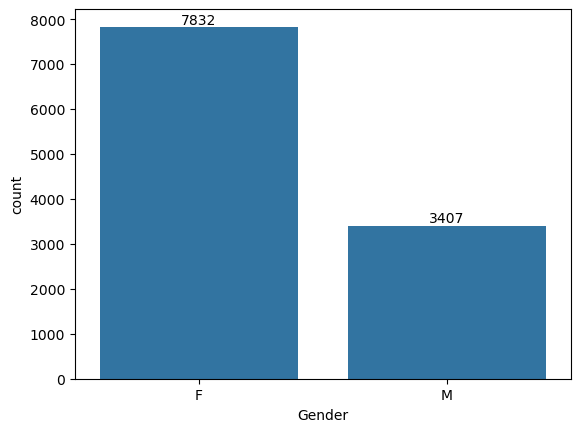

In [56]:
# Male vs Feamle Order 
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [58]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

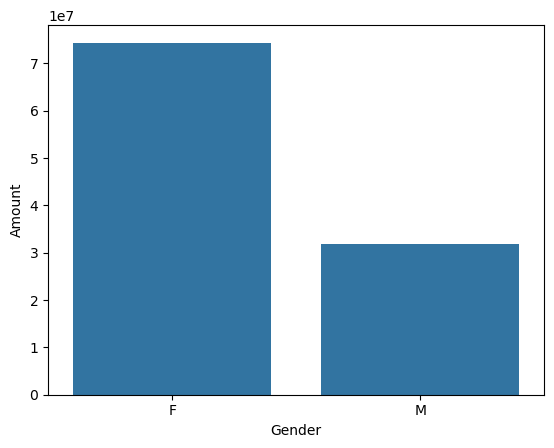

In [60]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

## Age

In [63]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

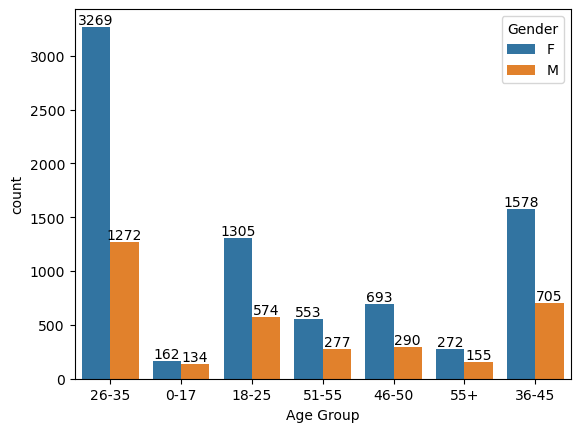

In [67]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

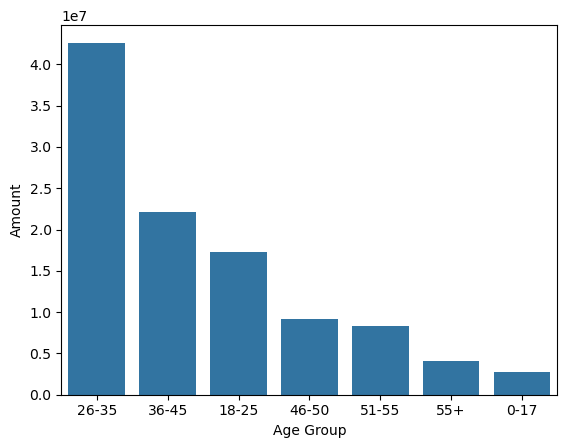

In [77]:
# Total Amount vs Age Group
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

## State

<Axes: xlabel='State', ylabel='Orders'>

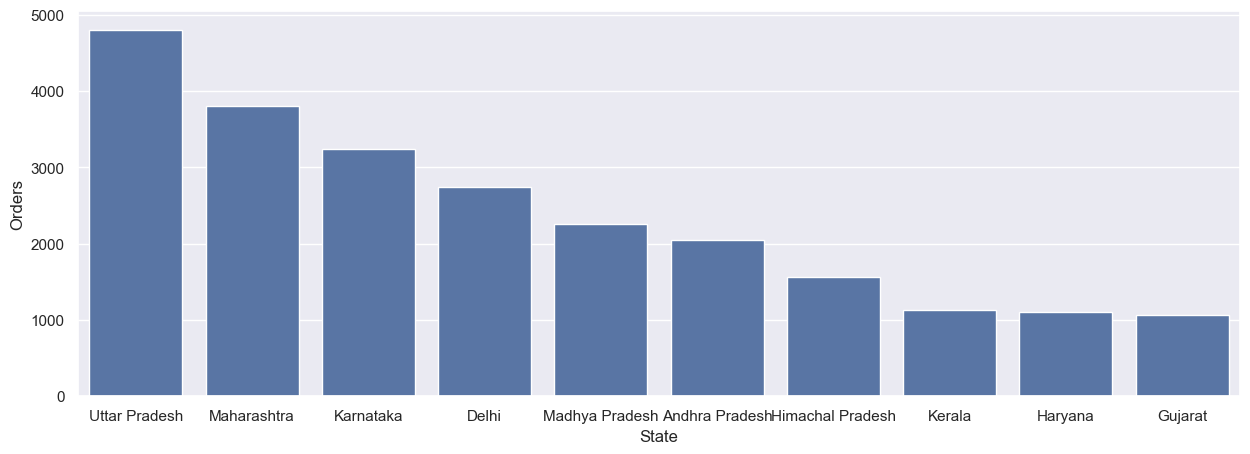

In [84]:
# Total number of orders from top 10 states
orders_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=orders_state)

<Axes: xlabel='State', ylabel='Amount'>

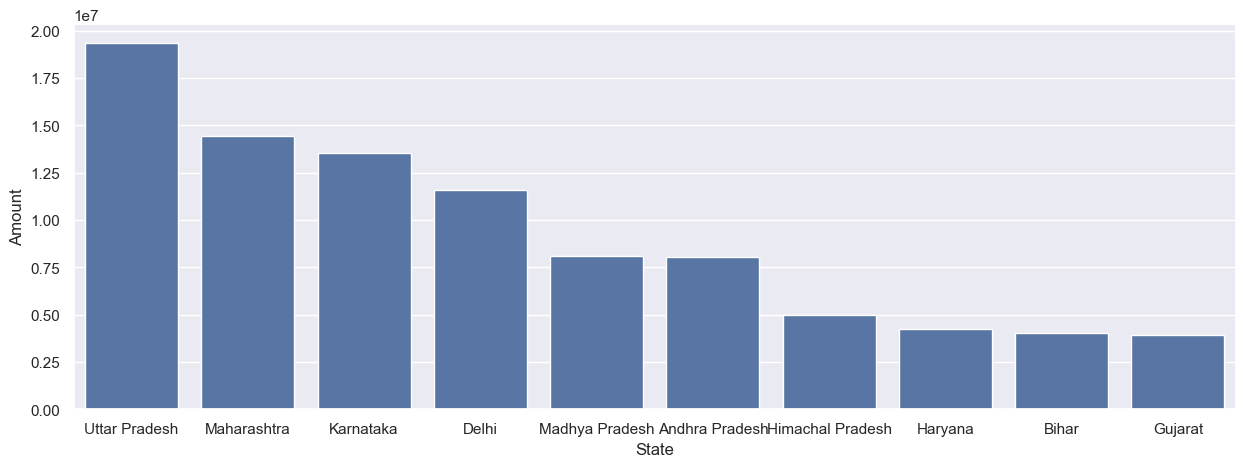

In [88]:
#Total Amount/Sales from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

## Marital Status

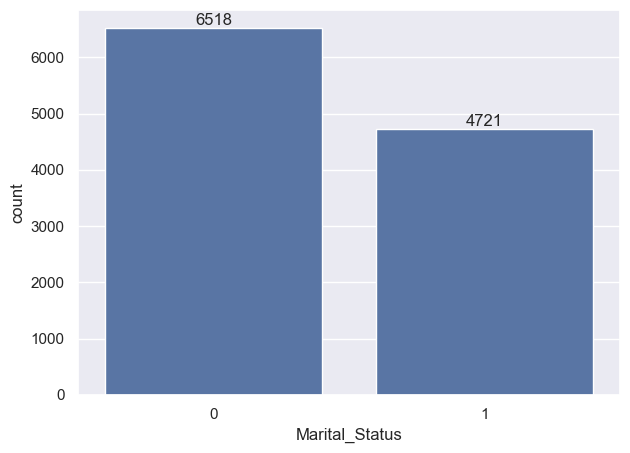

In [106]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

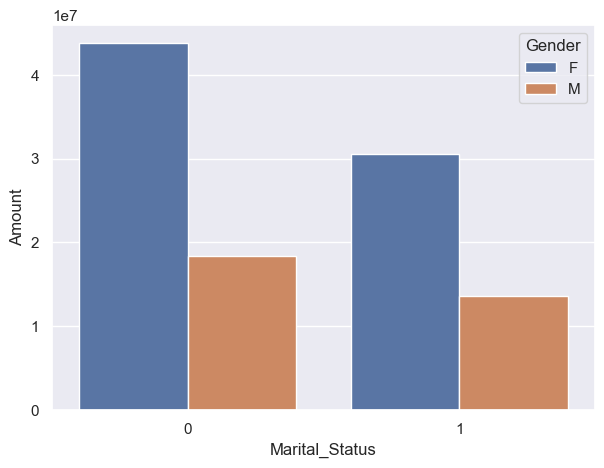

In [120]:
sales=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales)

## Occupation

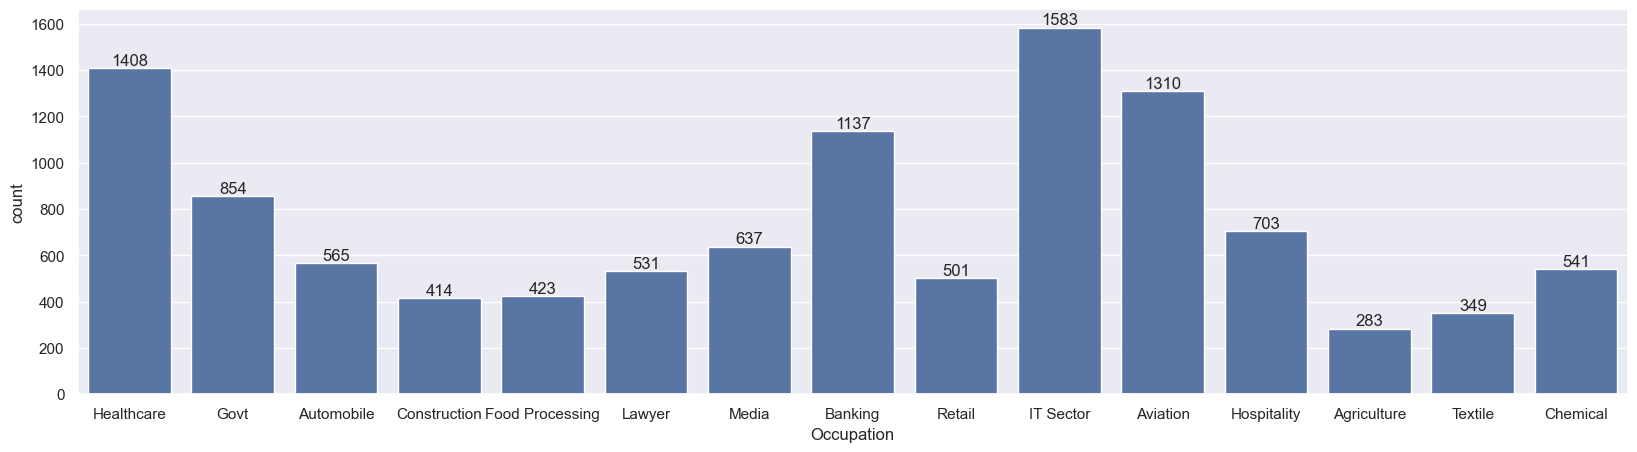

In [137]:
sns.set(rc={"figure.figsize":(20,5)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

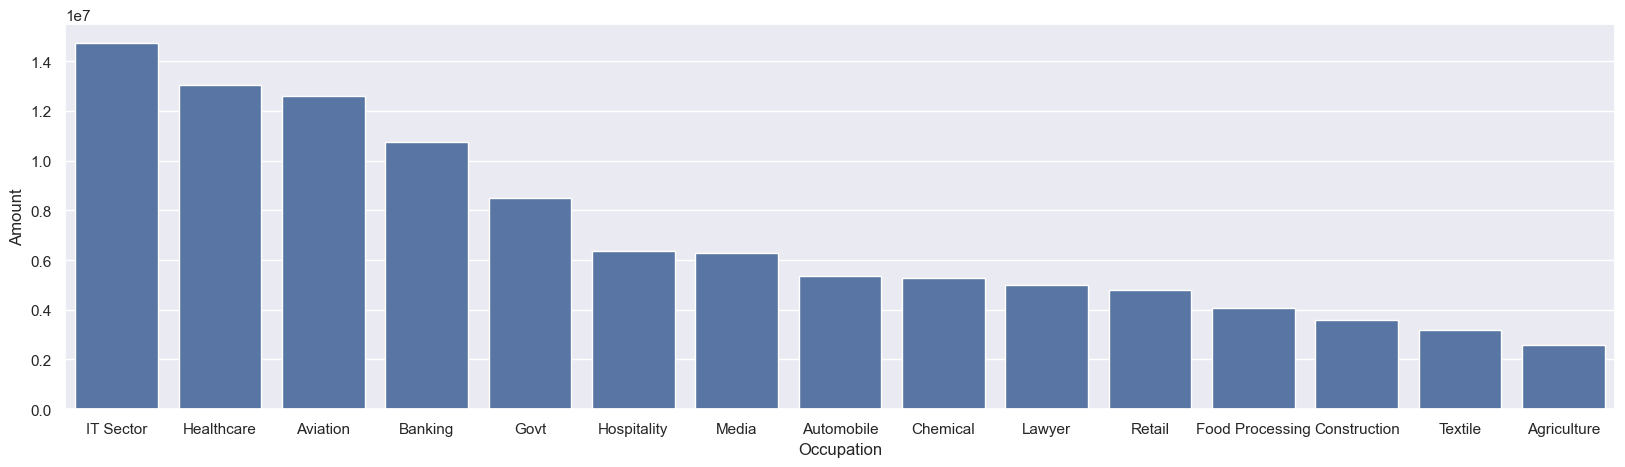

In [143]:
sales_occ=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_occ)

## Product Category

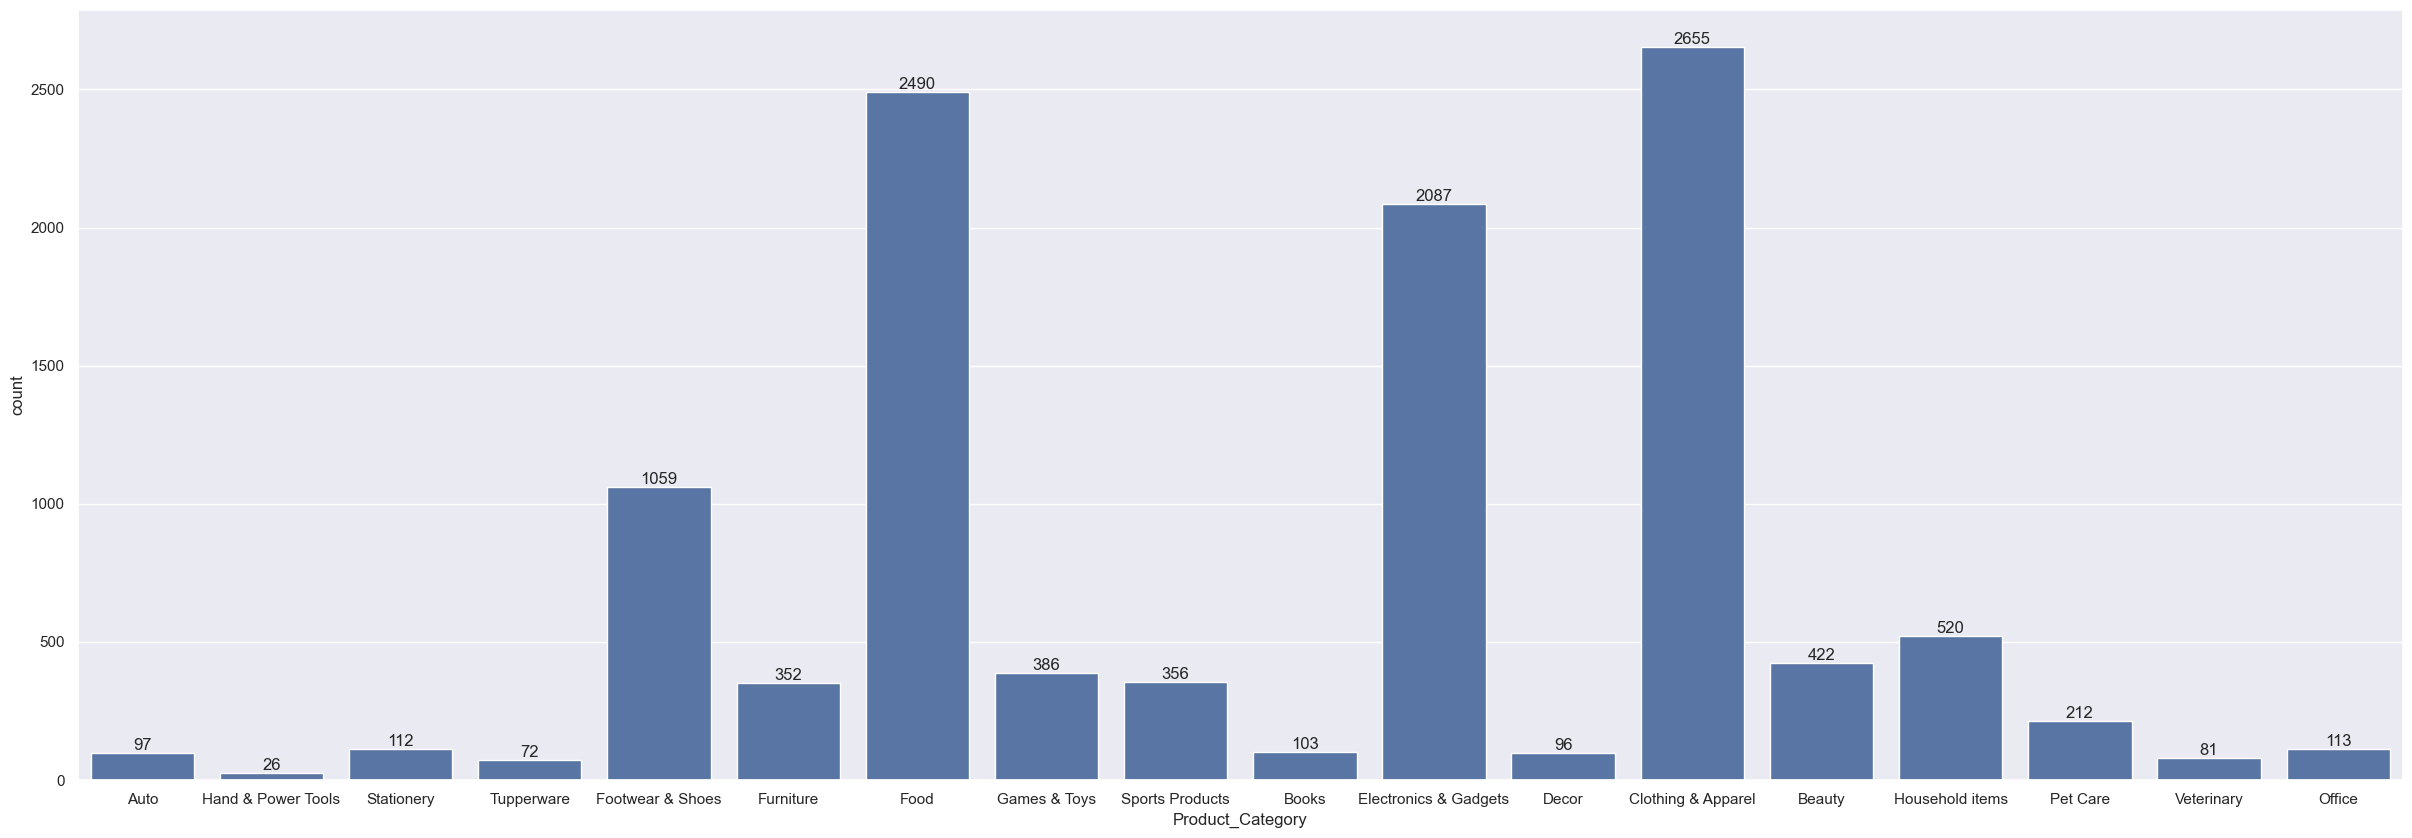

In [152]:
sns.set(rc={'figure.figsize':(30,10)})
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

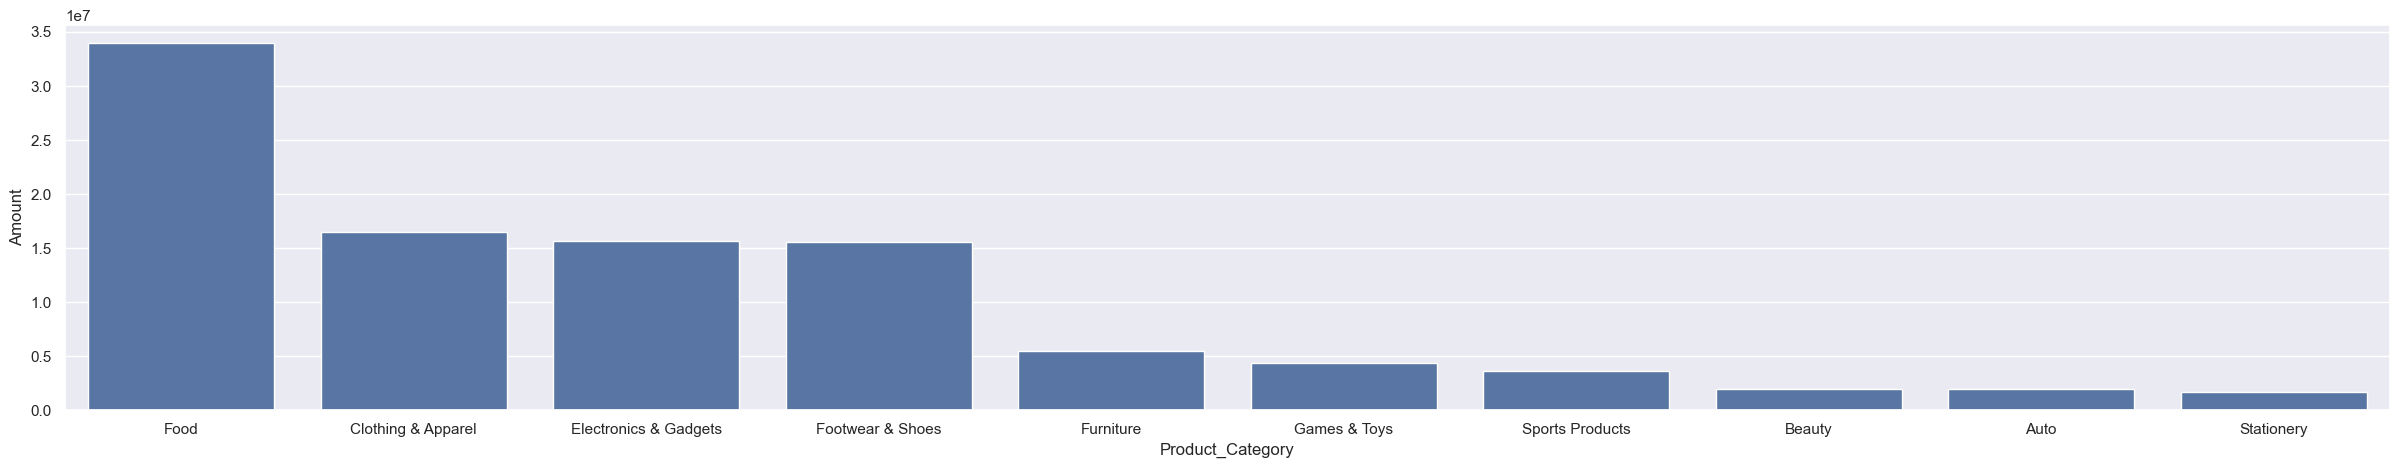

In [166]:
sales_prod=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(x='Product_Category',y='Amount',data=sales_prod)

<Axes: xlabel='Product_ID', ylabel='Orders'>

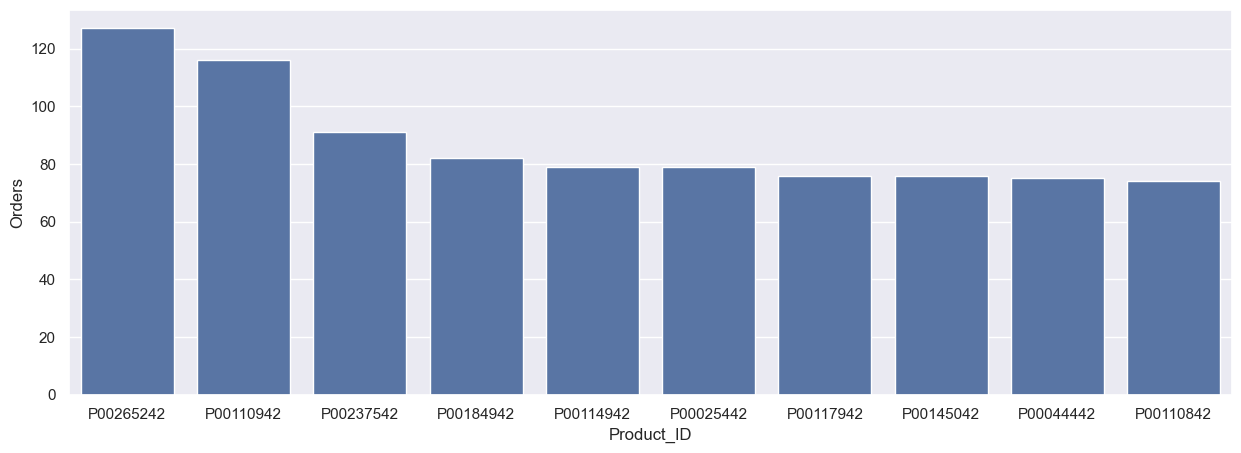

In [168]:
sale_prod=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product_ID',y='Orders',data=sale_prod)

# Conclusion: